In [ ]:
%cd /content/

/content/drive/MyDrive/Artificial Neural Network FALL2020/HW3/Q3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


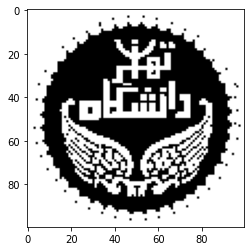

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


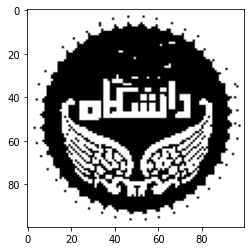

In [ ]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import copy

# Set the threshold value
threshold = 180

path = os.getcwd()

path_train = path+ '/UT_Train.png'
path_test  = path+ '/UT_Test.png'

def read_binarize_img(path_img):
    
    # Read the image
    img_train = Image.open(path_img).convert(mode="L")
    img_train = img_train.resize(size=(100,100))
    
    # Binarize the image
    img_train_array = np.asarray(img_train,dtype=np.uint8)
    x = np.zeros(img_train_array.shape,dtype=np.float)
    x[img_train_array > threshold] = 1
    x[x==0] = -1
    
    return x


# Read images
x = read_binarize_img(path_train)
y = read_binarize_img(path_test)

# Plot images
plt.imshow(np.repeat(x[:,:,np.newaxis], repeats=3, axis=2))
plt.show()
plt.imshow(np.repeat(y[:,:,np.newaxis], repeats=3, axis=2))
plt.show()

In [ ]:
Y = copy.deepcopy(y)
X = copy.deepcopy(x)

In [ ]:
def calc_weight(datas):
  data_shape = datas[0].shape
  size = np.nanprod(data_shape)
  datas_num = len(datas)
  d = []
  for i in range(datas_num):
    d.append(datas[i].reshape(1,size))
  
  W = np.zeros((size,size))

  for i in range(datas_num):
    W += d[i].T.dot(d[i])
  return W - datas_num * np.eye(size)

In [ ]:
weight = calc_weight([X])
weight

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [ ]:
from copy import deepcopy

def activation(input, threshold=0.5):
  if input > threshold:
    return 1
  elif input == threshold:
    return input
  else:
    return -1
def Discrete_Hopfield_Net(input, W, iteration):

  size = np.prod(input.shape)
  cnt = 0
  yy = deepcopy(input.reshape((size, )))
  xx = deepcopy(input.reshape((size, )))

  indx = list(range(size))
  np.random.shuffle(indx)
  yyn = 0
  itr = int(iteration/size)
  image_ = []

  for j in range(itr):
    for i in indx:
      yy[i] = xx[i] + np.sum(yy * W[:,i])
      yy[i] = activation(yy[i])
      cnt += 1

      if cnt%1000 == 0:
        ynn = deepcopy(yy.reshape(input.shape))
        image_.append(ynn)

  return image_

In [ ]:
filtered = Discrete_Hopfield_Net(Y, weight, 30000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

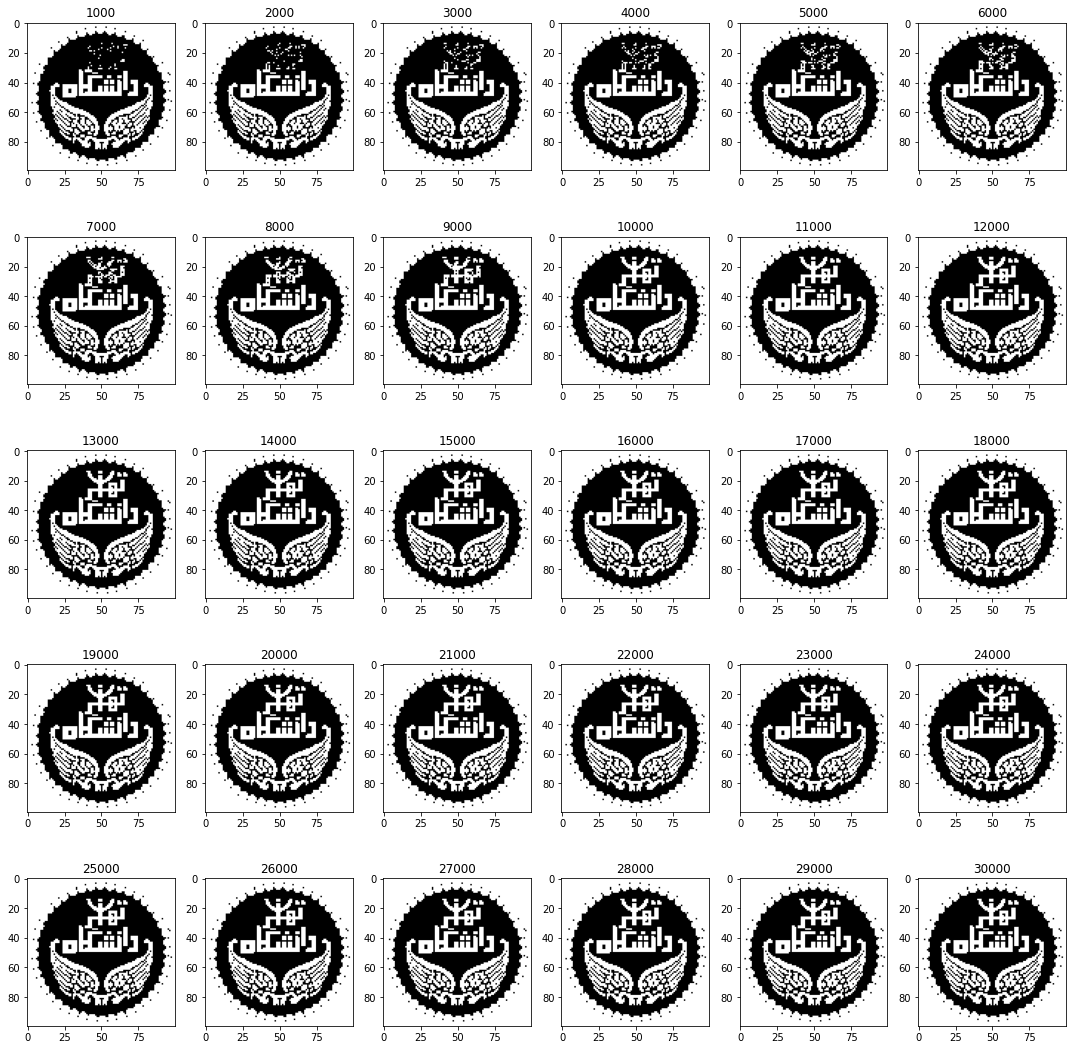

In [ ]:
fig, axs = plt.subplots(5,6)
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(5):
  for j in range(6):
    axs[i,j].imshow(np.repeat(filtered[6*i+j][:,:,np.newaxis], repeats=3, axis=2))
    axs[i,j].title.set_text("%d" %((6*i+j+1)*1000))
fig.tight_layout()